# I. Using the Simpsons dataset build words embeddings using GENSIM and word2vec

**File reading**
***

In [1]:
import pandas as pd
# Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df = pd.read_csv('docs/simpsons_dataset.csv').dropna()

# TODO
# target_simpsons = [
#     'Lisa Simpson', 
#     'Bart Simpson',
#     'Homer Simpson',
#     'Marge Simpson',
#     'Maggie Simpson',
#     'Grampa Simpson'
# ]
# df = df.loc[df['raw_character_text'].isin(target_simpsons)]

# imprima las primeras 5 filas
df.head()

#Cambiamos las etiquetas texutales por etiquetas numericas, esto es una buena practica cuando se construyen modelo supervisados
# df['label'] = df.label.map({'ham':0, 'spam':1})
print(df.shape)
df.head(20) # returns (rows, columns)

(131853, 2)


,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...
5,Martin Prince,I don't think there's anything left to say.
6,Edna Krabappel-Flanders,Bart?
7,Bart Simpson,Victory party under the slide!
9,Lisa Simpson,Mr. Bergstrom! Mr. Bergstrom!
10,Landlady,"Hey, hey, he Moved out this morning. He must h..."


## Text Pre Processing for embeddings

In [1]:
import gzip
import gensim
import logging

C:\Users\diego\anaconda3\envs\TF-Keras\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### BOW

In [3]:
from gensim.utils import simple_preprocess

def preproccess(line):
    return simple_preprocess(line)



df['proccesed'] = df['spoken_words'].apply(preproccess)
df.head(10)

,raw_character_text,spoken_words,proccesed
0,Miss Hoover,"No, actually, it was a little of both. Sometim...","[no, actually, it, was, little, of, both, some..."
1,Lisa Simpson,Where's Mr. Bergstrom?,"[where, mr, bergstrom]"
2,Miss Hoover,I don't know. Although I'd sure like to talk t...,"[don, know, although, sure, like, to, talk, to..."
3,Lisa Simpson,That life is worth living.,"[that, life, is, worth, living]"
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...,"[the, polls, will, be, open, from, now, until,..."
5,Martin Prince,I don't think there's anything left to say.,"[don, think, there, anything, left, to, say]"
6,Edna Krabappel-Flanders,Bart?,[bart]
7,Bart Simpson,Victory party under the slide!,"[victory, party, under, the, slide]"
9,Lisa Simpson,Mr. Bergstrom! Mr. Bergstrom!,"[mr, bergstrom, mr, bergstrom]"
10,Landlady,"Hey, hey, he Moved out this morning. He must h...","[hey, hey, he, moved, out, this, morning, he, ..."


In [4]:
documents = df['proccesed'].to_numpy()

### Generate 150 sized Word2vec embbedings

In [5]:
model_150 = gensim.models.Word2Vec(documents, vector_size=150, window=10, min_count=2, workers=10, sg=1)
model_150.train(documents, total_examples=len(documents), epochs=10)

(9561448, 12451860)

In [6]:
model_150.save("Simpsons_150_5.model")

In [7]:
print(model_150.wv['morning'])

[ 0.4258289   0.13726477  0.14132978 -0.15145917 -0.36198917  0.38784504
  0.5243108  -0.08483085  0.0683322  -0.46297     0.22925434  0.02794319
 -0.20644401  0.4453177   0.27433768 -0.50636923  0.12760963 -0.4550343
  0.10870258  0.28221408 -0.22347687  0.04838055  0.68131584 -0.35077074
 -0.03681159  0.07370722 -0.35913268  0.04818495 -0.01090085  0.2736619
 -0.36650112 -0.01926792 -0.11872506 -0.10127455 -0.04842565 -0.3345686
  0.18288398  0.26798272 -0.18631153  0.32390925  0.19760388  0.26048893
 -0.6945092  -0.00277634  0.15726253  0.42917562  0.20524189 -0.04264571
  0.36150822 -0.34429955  0.17702283 -0.18892503  0.42909968  0.5856046
 -0.01367093  0.15504505  0.2669979   0.52587765 -0.10407543  0.49002388
  0.4290533   0.04337217 -0.32528296 -0.26549634 -0.21536218 -0.21414067
 -0.38282683 -0.36104676  0.66655385 -0.2527798  -0.03657528  0.584125
  0.14284958 -0.2950672   0.47551998  0.18876107  0.4467416  -0.29827264
 -0.3689293  -0.1408004   0.6990583   0.13698784 -0.06889

### Generate 100 sized Word2vec embbedings

In [8]:
model_100 = gensim.models.Word2Vec (documents, vector_size=100, window=10, min_count=2, workers=10, sg=1)
model_100.train(documents,total_examples=len(documents),epochs=10)

(9561279, 12451860)

In [9]:
model_100.save("Simpsons_100_5.model")

In [10]:
print(model_100.wv['morning'])

[ 0.17059559  0.43689463  0.11353549 -0.7467892   0.40921855 -0.4138345
  0.16112766  0.5737557  -0.5463649  -0.39898622 -0.38480568 -0.24445611
  0.15984002  0.49623945  0.00184598 -0.20694062 -0.28267342 -0.6013943
 -0.11742117 -0.1207514  -0.21317653 -0.0159419   0.9880582  -0.1854509
  0.25174928  0.13658246 -0.3624938   0.6195732   0.32326642 -0.22609845
 -0.14563113  0.07645106  0.7218004   0.321743   -0.35755986  0.2745722
  0.14124401  0.64134985 -0.44459492 -0.04976046 -0.05050511  0.21232629
  0.00906446 -0.06907511 -0.11807965  0.35739693  0.48476171 -0.5717679
 -0.32755387 -0.38189107  0.07203054 -0.19777137  0.14432119 -0.35692146
  0.06065192  0.81797504 -0.2938978   0.05423464 -0.34824115  0.00520116
 -0.11564862  0.6882247  -0.28462258  0.38139787 -0.14246765  0.56189674
  0.01594383  0.55945706 -0.21619718  0.2542826  -0.22248378  0.3750903
  0.35528845  0.00538522  0.19916189  0.5766148   0.12745757  0.21349075
  0.38705382  0.13663135  0.24848501 -0.5986311  -0.23567

### Generate 50 sized Word2vec embbedings

In [11]:
model_50 = gensim.models.Word2Vec(documents, vector_size=50, window=10, min_count=2, workers=10, sg=1)
model_50.train(documents, total_examples=len(documents),epochs=10)

(9561850, 12451860)

In [12]:
model_50.save("Simpsons_50_5.model")


In [13]:
df.shape

(131853, 3)

## Load from disk the generated models


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import gensim

In [8]:

model50 = gensim.models.Word2Vec.load("Simpsons_50_5.model")
model100 = gensim.models.Word2Vec.load("Simpsons_100_5.model")
model150 = gensim.models.Word2Vec.load("Simpsons_150_5.model")

In [5]:
model50.wv.similar_by_word('homer')

[('marge', 0.8535465598106384),
 ('simpson', 0.7927496433258057),
 ('abe', 0.7889564633369446),
 ('phoney', 0.7849269509315491),
 ('nikki', 0.7823060750961304),
 ('karl', 0.7637245059013367),
 ('wildcats', 0.7633334994316101),
 ('bart', 0.756472110748291),
 ('womanhood', 0.7503025531768799),
 ('mr', 0.7502745985984802)]

In [18]:
def display_closestwords_tsnescatterplot(model, word, n):
    
    arr = np.empty((0,n), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.savefig(f'./{word}_{n}.jpg')
    plt.show()

# I. 2D Graphs and analysis
***

**Vector dimension:** 50

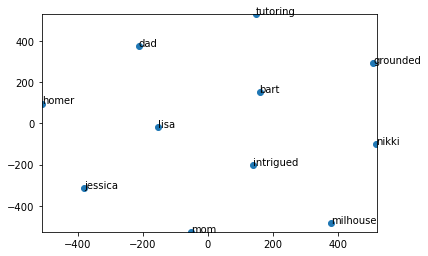

In [19]:
display_closestwords_tsnescatterplot(model50, 'bart', 50)

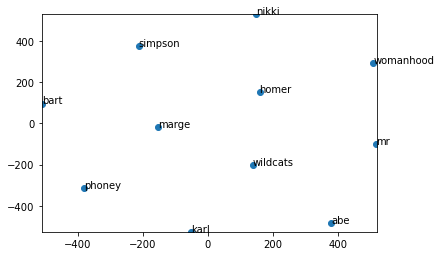

In [23]:
display_closestwords_tsnescatterplot(model50, 'homer', 50)

**Vector dimension:** 100

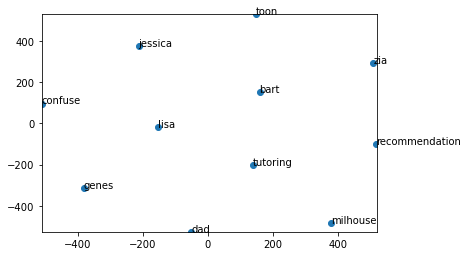

In [24]:
display_closestwords_tsnescatterplot(model100, 'bart', 100)

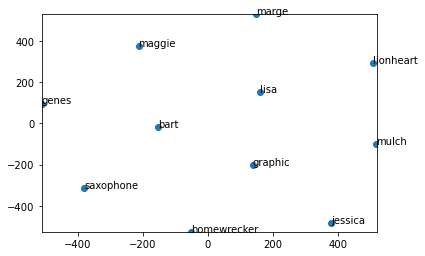

In [25]:
display_closestwords_tsnescatterplot(model100, 'lisa', 100)

**Vector size:** 150

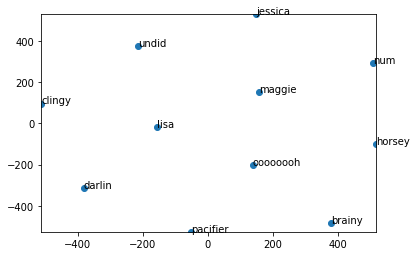

In [55]:
display_closestwords_tsnescatterplot(model150, 'maggie', 150)

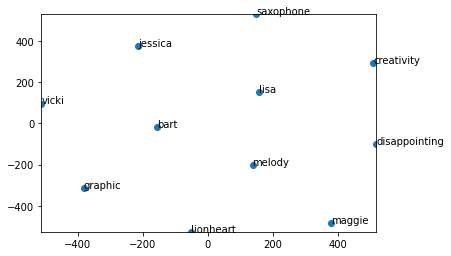

In [56]:
display_closestwords_tsnescatterplot(model150, 'lisa', 150)

# III. Redes neuronales


In [18]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

## Preparacion de los datos

In [63]:
'''
Aquí se filtra el dataset para que solo queden los dialogos relevantes, los de ls personajes principales.
'''
# Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df_0 = pd.read_csv('docs/simpsons_dataset.csv').dropna()

target_simpsons = [
    'Lisa Simpson', 
    'Bart Simpson',
    'Homer Simpson',
    'Marge Simpson',
    'Maggie Simpson',
    'Grampa Simpson'
]
df = df_0.loc[df_0['raw_character_text'].isin(target_simpsons)]

In [64]:
'''
Se realiza un Encoding de los nombres de los personajes principales. 
La idea es que cada categoría de personaje este codificada por un vector
1x6 binario. 
'''
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[['raw_character_text']])
print(enc.categories_)

[array(['Bart Simpson', 'Grampa Simpson', 'Homer Simpson', 'Lisa Simpson',
       'Maggie Simpson', 'Marge Simpson'], dtype=object)]


In [65]:
'''
Se dividen los datos en 60 training, 20 validación y 20 testing
'''
# df_yelp = df[df['source'] == 'yelp']
sentences = df['spoken_words'].values

y = enc.transform(df[['raw_character_text']]).toarray()
sentences_train_val, sentences_test, y_train_val, y_test = train_test_split(sentences, y, test_size=0.20, random_state=1000)
sentences_train, sentences_val, y_train, y_val = train_test_split(sentences_train_val, y_train_val, test_size=0.25, random_state=1000)

# Once we have our handles, we format the datasets in a Keras-fit compatible
# format: a tuple of the form (text_data, label).
train_dataset = tf.data.Dataset.from_tensor_slices((sentences_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((sentences_test, y_test))

# We also create a dataset with only the textual data in it. This will be used
# to build our vocabulary later on.
text_dataset = tf.data.Dataset.from_tensor_slices((sentences_train))

In [50]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [22]:
vectorize_layer = TextVectorization(
    ngrams=None, max_tokens=None, vocabulary=None,
    output_mode='binary', output_sequence_length=None, pad_to_max_tokens=True, 
)

Now that the vocab layer has been created, call `adapt` on the text-only
 dataset to create the vocabulary

In [23]:
vectorize_layer.adapt(text_dataset.batch(32))
len(vectorize_layer.get_vocabulary())

20742

## Prueba 1

In [10]:
##LAYERS

# Start by creating an explicit input layer. It needs to have a shape of  
# (1,) (because we need to guarantee that there is exactly one doc
text_input = tf.keras.Input(shape=(1,), dtype=tf.string, name='text') 

# The first layer in our model is the vectorization layer. After this layer,
# we have a tensor of shape (batch_size, max_len) containing vocab indices.

x = vectorize_layer(text_input) 
primera_capa = layers.Dense(10, activation='relu')(x)

# We project onto a single unit output layer, and squash it with a sigmoid:
predictions = layers.Dense( len(target_simpsons), activation='softmax', name='predictions')(primera_capa) 
model = tf.keras.Model(text_input, predictions)

# Compile the model with binary crossentropy loss and an adam optimizer.
# https://keras.io/api/losses/
# https://keras.io/api/optimizers/
# Ojo con las metricas ya que el entrenamiento es en batches
# https://keras.io/api/models/model_training_apis/
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [24]:
# list(enc.get_feature_names())
len(vectorize_layer.get_vocabulary())

20742

In [63]:
batch_size = 32
epochs = 20

# Fit the model using the train and test datasets.
model.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size), 
    epochs=epochs)

Epoch 1/20
1249/1249 [==============================] - 13s 9ms/step - loss: 0.4624 - accuracy: 0.3704 - val_loss: 0.3451 - val_accuracy: 0.4814
Epoch 2/20
1249/1249 [==============================] - 11s 9ms/step - loss: 0.3287 - accuracy: 0.5114 - val_loss: 0.3325 - val_accuracy: 0.5000
Epoch 3/20
1249/1249 [==============================] - 12s 10ms/step - loss: 0.2994 - accuracy: 0.5708 - val_loss: 0.3313 - val_accuracy: 0.5033
Epoch 4/20
1249/1249 [==============================] - 12s 10ms/step - loss: 0.2760 - accuracy: 0.6183 - val_loss: 0.3361 - val_accuracy: 0.4975
Epoch 5/20
1249/1249 [==============================] - 12s 10ms/step - loss: 0.2571 - accuracy: 0.6538 - val_loss: 0.3444 - val_accuracy: 0.4926
Epoch 6/20
1249/1249 [==============================] - 12s 10ms/step - loss: 0.2416 - accuracy: 0.6783 - val_loss: 0.3547 - val_accuracy: 0.4884
Epoch 7/20
1249/1249 [==============================] - 12s 10ms/step - loss: 0.2289 - accuracy: 0.6952 - val_loss: 0.3664 - v

In [65]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text (InputLayer)            [(None, 1)]               0         
_________________________________________________________________
text_vectorization_2 (TextVe (None, 20742)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                207430    
_________________________________________________________________
predictions (Dense)          (None, 6)                 66        
Total params: 207,496
Trainable params: 207,496
Non-trainable params: 0
_________________________________________________________________


# 3. Multinomial classification using Embbedings

In [25]:
from keras.models import Sequential

In [33]:
# Load pretrained models
model_50 = gensim.models.Word2Vec.load("Simpsons_50_5.model")
model_100 = gensim.models.Word2Vec.load("Simpsons_100_5.model")
model_150 = gensim.models.Word2Vec.load("Simpsons_150_5.model")

In [16]:
# pretrained.wv.index_to_key

def get_weight_matrix(embedding, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) 
    embedding_dim = len(embedding['homer'])
    hits = 0
    misses = 0
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, embedding_dim))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for i in range(len(vocab)):
        try:
            weight_matrix[i] = embedding[vocab[i]]
            hits += 1
        except:
            misses += 1
    print("Converted %d words (%d misses)" % (hits, misses))
    return weight_matrix

In [66]:

x_train = vectorize_layer(np.array([[s] for s in sentences_train])).numpy()
x_val = vectorize_layer(np.array([[s] for s in sentences_val])).numpy()

y_train = np.array(y_train)
y_val = np.array(y_val)

In [70]:
print(x_train.shape)
print(x_val.shape)
# print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
# print(y_test.shape)

(39951, 20742)
(13317, 20742)
(39951, 6)
(13317, 6)


In [31]:
def generatePreEmbbedingModel(model, embedding_dim, vectorize_layer, architecture_id = 1):
    batch_size = 32
    epochs = 10
    weights = get_weight_matrix(model.wv, vectorize_layer.get_vocabulary())
    num_tokens = len(vectorize_layer.get_vocabulary()) 
    embedding_layer = layers.Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer=tf.keras.initializers.Constant(weights),
        trainable=False,
    )

    int_sequences_input = tf.keras.Input(shape=(None,), dtype='int64')
    embedded_sequences = embedding_layer(int_sequences_input)
    x = layers.GlobalAveragePooling1D()(embedded_sequences)

    if architecture_id == 1:
        x = layers.Dense(10, activation='relu')(x)
    elif architecture_id == 2:
        x = layers.SimpleRNN(5)(x)
        x = layers.Dropout(0.3)(x)
        x = layers.Dense(10, activation='relu')(x)
    elif architecture_id == 3:
        x = layers.Dense(80, activation='relu')(x)
        x = layers.Dropout(0.3)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dense(250, activation='relu')(x)
        x = layers.Dropout(0.5)(x)

    preds = layers.Dense(len(target_simpsons), activation='softmax')(x)
    modelRN = tf.keras.Model(int_sequences_input, preds)

    return modelRN



In [56]:
#Parameters

batch_size = 32
epochs = 10

In [57]:
red_50 = generatePreEmbbedingModel(model_50, 50, vectorize_layer)
red_100 = generatePreEmbbedingModel(model_100, 100, vectorize_layer)
red_150 = generatePreEmbbedingModel(model_150, 150, vectorize_layer)

Converted 14991 words (5751 misses)
Converted 14991 words (5751 misses)
Converted 14991 words (5751 misses)


In [58]:
red_50.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_4 (Embedding)      (None, None, 50)          1037100   
_________________________________________________________________
global_average_pooling1d_4 ( (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 66        
Total params: 1,037,676
Trainable params: 576
Non-trainable params: 1,037,100
_________________________________________________________________


In [59]:
red_100.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_5 (Embedding)      (None, None, 100)         2074200   
_________________________________________________________________
global_average_pooling1d_5 ( (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 66        
Total params: 2,075,276
Trainable params: 1,076
Non-trainable params: 2,074,200
_________________________________________________________________


In [60]:
red_150.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_6 (Embedding)      (None, None, 150)         3111300   
_________________________________________________________________
global_average_pooling1d_6 ( (None, 150)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1510      
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 66        
Total params: 3,112,876
Trainable params: 1,576
Non-trainable params: 3,111,300
_________________________________________________________________


In [71]:
red_50.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_100.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_150.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [72]:
red_50.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
1249/1249 [==============================] - 54s 43ms/step - loss: 1.4466 - accuracy: 0.4210 - val_loss: 1.4190 - val_accuracy: 0.4165
Epoch 2/10
1249/1249 [==============================] - 54s 43ms/step - loss: 1.4159 - accuracy: 0.4150 - val_loss: 1.4087 - val_accuracy: 0.4165
Epoch 3/10
1249/1249 [==============================] - 53s 43ms/step - loss: 1.3977 - accuracy: 0.4228 - val_loss: 1.4045 - val_accuracy: 0.4165
Epoch 4/10
1249/1249 [==============================] - 54s 43ms/step - loss: 1.4017 - accuracy: 0.4153 - val_loss: 1.4025 - val_accuracy: 0.4165
Epoch 5/10
1249/1249 [==============================] - 56s 45ms/step - loss: 1.3940 - accuracy: 0.4210 - val_loss: 1.4014 - val_accuracy: 0.4165
Epoch 6/10
1249/1249 [==============================] - 54s 43ms/step - loss: 1.3960 - accuracy: 0.4187 - val_loss: 1.4008 - val_accuracy: 0.4165
Epoch 7/10
1249/1249 [==============================] - 55s 44ms/step - loss: 1.3953 - accuracy: 0.4208 - val_loss: 1.4005 -

In [73]:
red_100.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
1249/1249 [==============================] - 89s 71ms/step - loss: 1.6670 - accuracy: 0.4170 - val_loss: 1.4745 - val_accuracy: 0.4165
Epoch 2/10
1249/1249 [==============================] - 88s 70ms/step - loss: 1.4507 - accuracy: 0.4236 - val_loss: 1.4264 - val_accuracy: 0.4165
Epoch 3/10
1249/1249 [==============================] - 88s 71ms/step - loss: 1.4182 - accuracy: 0.4204 - val_loss: 1.4131 - val_accuracy: 0.4165
Epoch 4/10
1249/1249 [==============================] - 91s 73ms/step - loss: 1.4057 - accuracy: 0.4198 - val_loss: 1.4073 - val_accuracy: 0.4165
Epoch 5/10
1249/1249 [==============================] - 92s 73ms/step - loss: 1.4015 - accuracy: 0.4201 - val_loss: 1.4041 - val_accuracy: 0.4165
Epoch 6/10
1249/1249 [==============================] - 90s 72ms/step - loss: 1.3981 - accuracy: 0.4205 - val_loss: 1.4023 - val_accuracy: 0.4165
Epoch 7/10
1249/1249 [==============================] - 90s 72ms/step - loss: 1.3953 - accuracy: 0.4187 - val_loss: 1.4016 -

In [ ]:
red_150.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

## 4.1 Red Feedforward

### Using trained in place embeddings

In [67]:
from keras.models import Sequential

In [68]:
#Parameters

batch_size = 32
epochs = 10

In [64]:
vocab_size = wm.shape[0]
embedding_dim = 50
max_dialog_length = 200

20742

In [ ]:
len(vectorize_layer.get_vocabulary())

In [ ]:
embedding_dim = 5

modelemb = Sequential([
  vectorize_layer,
  layers.Embedding(vocab_size, embedding_dim, weights=[wm], input_length=max_dialog_length, name="embedding", trainable=False),
  layers.GlobalAveragePooling1D(),
  layers.Dense(10, activation='relu'),
  layers.Dense(len(target_simpsons), activation='softmax')
])

In [ ]:
modelemb.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [ ]:
modelemb.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=epochs)

In [ ]:
modelemb.summary()

### Output mode: binary

In [51]:
# 

In [40]:
vectorize_layer = TextVectorization(
    ngrams=None,
    max_tokens=None, vocabulary=None,
    output_mode='binary', output_sequence_length=None, pad_to_max_tokens=True,
)

vectorize_layer.adapt(text_dataset.batch(batch_size))

In [75]:
vocab_size = len(vectorize_layer.get_vocabulary())
vocab_size

20742

In [76]:
embedding_dim = 5

modelemb = Sequential([
  vectorize_layer,
  layers.Embedding(vocab_size, embedding_dim, name="embedding"),
  layers.GlobalAveragePooling1D(),
  layers.Dense(10, activation='relu'),
  layers.Dense(len(target_simpsons), activation='softmax')
])

In [77]:
modelemb.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [78]:
modelemb.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=epochs)

Epoch 1/10
1249/1249 [==============================] - 57s 45ms/step - loss: 1.5551 - accuracy: 0.4017 - val_loss: 1.4069 - val_accuracy: 0.4155
Epoch 2/10
1249/1249 [==============================] - 55s 44ms/step - loss: 1.3997 - accuracy: 0.4186 - val_loss: 1.4041 - val_accuracy: 0.4155
Epoch 3/10
1249/1249 [==============================] - 58s 46ms/step - loss: 1.3978 - accuracy: 0.4186 - val_loss: 1.4036 - val_accuracy: 0.4155
Epoch 4/10
1249/1249 [==============================] - 56s 44ms/step - loss: 1.3975 - accuracy: 0.4186 - val_loss: 1.4035 - val_accuracy: 0.4155
Epoch 5/10
1249/1249 [==============================] - 57s 46ms/step - loss: 1.3974 - accuracy: 0.4186 - val_loss: 1.4035 - val_accuracy: 0.4155
Epoch 6/10
1249/1249 [==============================] - 58s 47ms/step - loss: 1.3974 - accuracy: 0.4186 - val_loss: 1.4035 - val_accuracy: 0.4155
Epoch 7/10
1249/1249 [==============================] - 58s 47ms/step - loss: 1.3974 - accuracy: 0.4186 - val_loss: 1.4035 -

In [45]:
modelemb.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_6 (TextVe (None, 20742)             0         
_________________________________________________________________
embedding (Embedding)        (None, 20742, 5)          103710    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 5)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 66        
Total params: 103,836
Trainable params: 103,836
Non-trainable params: 0
_________________________________________________________________


### Output mode: int

In [46]:
vectorize_layer = TextVectorization(
    ngrams=None,
    max_tokens=None, vocabulary=None,
    output_mode='int', output_sequence_length=None, pad_to_max_tokens=True,
)

vectorize_layer.adapt(text_dataset.batch(batch_size))

In [47]:
vocab_size = len(vectorize_layer.get_vocabulary())
vocab_size

20743

In [48]:
embedding_dim = 5

modelemb = Sequential([
  vectorize_layer,
  layers.Embedding(vocab_size, embedding_dim, name="embedding"),
  layers.GlobalAveragePooling1D(),
  layers.Dense(10, activation='relu'),
  layers.Dense(len(target_simpsons), activation='softmax')
])

In [49]:
modelemb.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [50]:
modelemb.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=epochs)

Epoch 1/10
1249/1249 [==============================] - 10s 8ms/step - loss: 1.5162 - accuracy: 0.4056 - val_loss: 1.3974 - val_accuracy: 0.4155
Epoch 2/10
1249/1249 [==============================] - 9s 7ms/step - loss: 1.3818 - accuracy: 0.4186 - val_loss: 1.3691 - val_accuracy: 0.4193
Epoch 3/10
1249/1249 [==============================] - 10s 8ms/step - loss: 1.3335 - accuracy: 0.4313 - val_loss: 1.3164 - val_accuracy: 0.4448
Epoch 4/10
1249/1249 [==============================] - 10s 8ms/step - loss: 1.2485 - accuracy: 0.4741 - val_loss: 1.2736 - val_accuracy: 0.4760
Epoch 5/10
1249/1249 [==============================] - 10s 8ms/step - loss: 1.1686 - accuracy: 0.5273 - val_loss: 1.2558 - val_accuracy: 0.4844
Epoch 6/10
1249/1249 [==============================] - 10s 8ms/step - loss: 1.1115 - accuracy: 0.5614 - val_loss: 1.2559 - val_accuracy: 0.4859
Epoch 7/10
1249/1249 [==============================] - 10s 8ms/step - loss: 1.0691 - accuracy: 0.5845 - val_loss: 1.2634 - val_acc

In [51]:
modelemb.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_7 (TextVe (None, None)              0         
_________________________________________________________________
embedding (Embedding)        (None, None, 5)           103715    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 5)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 66        
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
_________________________________________________________________


### Output mode: tf-idf

In [91]:
vectorize_layer = TextVectorization(
    ngrams=None,
    max_tokens=None, vocabulary=None,
    output_mode='tf-idf', output_sequence_length=None, pad_to_max_tokens=True,
)

vectorize_layer.adapt(text_dataset.batch(batch_size))

In [92]:
vocab_size = len(vectorize_layer.get_vocabulary())
vocab_size

20742

In [16]:
embedding_dim = 5

modelemb = Sequential([
  vectorize_layer,
  layers.Embedding(vocab_size, embedding_dim, name="embedding"),
  layers.GlobalAveragePooling1D(),
  layers.Dense(10, activation='relu'),
  layers.Dense(len(target_simpsons), activation='softmax')
])

In [94]:
modelemb.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [95]:
modelemb.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=epochs,)

Epoch 1/10
1249/1249 [==============================] - 62s 49ms/step - loss: 1.5201 - accuracy: 0.4017 - val_loss: 1.4054 - val_accuracy: 0.4155

In [97]:
modelemb.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_3 (TextVe (None, 20742)             0         
_________________________________________________________________
embedding (Embedding)        (None, 20742, 5)          103710    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 5)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 66        
Total params: 103,836
Trainable params: 103,836
Non-trainable params: 0
_________________________________________________________________


## 4.1 Red Feedforward

### Using pre-trained in place embeddings

## 4.2 RNN

In [15]:
from keras.layers.recurrent import LSTM, GRU, SimpleRNN

### Output mode: binary

In [15]:
vectorize_layer = TextVectorization(
    ngrams=None,
    max_tokens=None, vocabulary=None,
    output_mode='binary', output_sequence_length=None, pad_to_max_tokens=True,
)

vectorize_layer.adapt(text_dataset.batch(batch_size),
)

In [17]:
vocab_size = len(vectorize_layer.get_vocabulary())
vocab_size

20742

In [36]:
embedding_dim = 50

modelemb = Sequential([
  # vectorize_layer,
  # layers.Embedding(vocab_size, embedding_dim, name="embedding"),

  layers.SimpleRNN(embedding_dim),
    #layers.Dropout(0.5)
  # layers.Dense(10, activation='relu'),
  layers.Dense(len(target_simpsons), activation='softmax')
])



In [37]:
modelemb.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [21]:
modelemb.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=epochs)

Epoch 1/10
   1/1249 [..............................] - ETA: 21:39:51 - loss: 1.8302 - accuracy: 0.0312

In [41]:
print(len(target_simpsons))
modelemb.build((1, 50, 10))
modelemb.summary()

6
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     multiple                  3050      
_________________________________________________________________
dense_5 (Dense)              multiple                  306       
Total params: 3,356
Trainable params: 3,356
Non-trainable params: 0
_________________________________________________________________


In [67]:
print(batch_size)

32


In [56]:
420
# %pip install numpy==1.19.5
# %pip install gensim==4.0.1

In [29]:
import numpy as np
print(numpy.__version__)

1.19.5


In [46]:
# type(np.array([1, 1, 1]).shape)
import tensorflow as tf
# tf.config.list_physical_devices('GPU')
# # Creates a graph.
# a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
# b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
# c = tf.matmul(a, b)
# # Creates a session with log_device_placement set to True.
# sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# # Runs the op.
# print(sess.run(c))

# confirm TensorFlow sees the GPU
from tensorflow.python.client import device_lib
assert 'GPU' in str(device_lib.list_local_devices())

# confirm Keras sees the GPU (for TensorFlow 1.X + Keras)
# from keras import backend
# assert len(backend.tensorflow_backend._get_available_gpus()) > 0

In [1]:
import tensorflow as tf
import keras as ks
import gensim
print(tf.__version__)
print(ks.__version__)
print(gensim.__version__)

2.4.1
2.4.3
4.0.1
C:\Users\diego\anaconda3\envs\TF-Keras\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
